# Naive Persistence Model

### NPM suggests that the Forecast for current Observation is the value of the previous Observation.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('daily-min-temperatures.csv', header = 0, parse_dates=[0])

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df['t+1'] = df['Temp'].shift(1)

In [7]:
test = df.iloc[-7:]
train = df.iloc[1:-7]

In [10]:
train

,Date,Temp,t+1
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8
...,...,...,...
3638,1990-12-20,15.4,14.7
3639,1990-12-21,13.1,15.4
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2


In [8]:
X_test, y_test = test['t+1'], test['Temp']
X_train, y_train = train['t+1'], train['Temp']

# Walk Forward Validation

In [11]:
pred = X_test.copy()

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
mean_squared_error(pred, y_test)

3.4228571428571413

In [14]:
import matplotlib.pyplot as plt

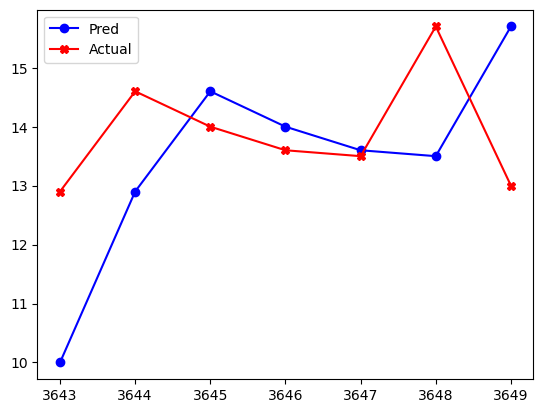

In [22]:
plt.plot(pred, label = 'Pred', color = 'b', marker = 'o')
plt.plot(y_test, label = 'Actual', c ='r', marker = 'X')
plt.legend()